In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import re
from bs4 import BeautifulSoup
from tqdm import tqdm

In [2]:
TRAIN_SPLIT = 0.8

%matplotlib inline
file_name = "./data/amazon-fine-food-reviews/Reviews.csv"
df = pd.read_csv(file_name)
len(df)

568454

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
ts = max(df.iloc[:, 7])
print(ts)
time_local = time.localtime(ts)
dt = time.strftime("%Y-%m-%d %H:%M:%S", time_local) 
print(dt)

1351209600
2012-10-26 08:00:00


In [5]:
dt = "2010-01-01 080000"

time_array = time.strptime(dt, "%Y-%m-%d %H%M%S")
timestamp = time.mktime(time_array)
print(timestamp)

1262304000.0


In [6]:
df = df[df['Time'] > timestamp]
len(df)

447702

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...


In [8]:
df.shape

(447702, 10)

In [9]:
# check duplicates
df[df.duplicated({"UserId","ProfileName","Time", "Text"})]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2647,2648,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,0,0,2,1313107200,way too weak for my tastes,"What can i say, I love iced tea. I drink a lot..."
2653,2654,B0016FY6H6,A3I4PCBRENJNG2,L. Cain,0,0,4,1300579200,quality lightly sweetened green tea powder,lots of uses for this green tea...<br /><br />...
2946,2947,B0002TJAZK,A2ISKAWUPGGOLZ,M. S. Handley,0,1,1,1310774400,Kitty Junk Food,We have five cats - one an elderly cat of 15 y...
2947,2948,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,0,2,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
3885,3886,B005GX7GVW,AS1FCKNKY95ID,"Juli A. Lee ""JingleJL""",1,1,5,1336953600,Great and good price!,I love these noodles. They are really great f...
3886,3887,B005GX7GVW,A1I34N9LFOSCX7,Smeggy,0,0,5,1349136000,Yum!,This soup cooks up quickly and is very yummy! ...
4640,4641,B0002NYO9I,A5DVX3B075B09,Patricia Kays,0,0,5,1338940800,LOVELY JUNIPER BERRIES,"Dried berries, still with texture and the quin..."
4641,4642,B0002NYO9I,A376TWN7I4HMZ8,helios,0,1,5,1324252800,Exaclty what i ordered,"Again, exactly what I ordered. No fuss, no mus..."
4642,4643,B0002NYO9I,A29CO2S0VTT0C5,S. Choo,0,3,3,1326758400,get a new package,"Berries are find, but the package is bad. Unab..."


In [10]:
df[df['UserId'] == "A2EPNS38TTLZYN"]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
251,252,B0017129DC,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
18421,18422,B001717UH2,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
375443,375444,B001717UFO,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
399114,399115,B001717UGI,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...


In [11]:
# drop duplicates
sorted_data = df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
df = sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time", "Text"}, keep='first', inplace=False)
df.shape

(310604, 10)

In [12]:
# drop and reorder columns
df = df[['Id', 'Summary', 'Text', 'Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator']]
df.columns = ['Id', 'Summary', 'Text', 'Score', 'VotesHelpful', 'VotesTotal']

In [13]:
df.head()

,Id,Summary,Text,Score,VotesHelpful,VotesTotal
150527,150528,Size does matter,This book was purchased to be used in a classr...,3,0,1
150517,150518,love this book,"Great book, perfect condition arrived in a sho...",5,0,0
150516,150517,good for children,"Classic children's book, can't go wrong. I rea...",5,0,0
150515,150516,Darling!,"The same author wrote ""Where the Wild Things A...",5,0,0
150514,150515,One of our family's favorite books,This book is a family favorite and was read to...,5,0,0


In [14]:
# preprocessing review text
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

In [15]:
# the set of stopwords is listed here
stopwords = set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [16]:
preprocessed_reviews = []
for sentence in tqdm(df["Text"].values):
    if sentence is np.nan:
        sentence = " "
    sentence = BeautifulSoup(sentence, "lxml").get_text()
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentence.strip())

df["Text"] = preprocessed_reviews

100%|██████████| 310604/310604 [01:58<00:00, 2625.31it/s]


In [17]:
# preprocessing review summary
preprocessed_summary = []
for sentence in tqdm(df["Summary"].values):
    if sentence is np.nan:
        sentence = " "
    sentence = BeautifulSoup(sentence, "lxml").get_text()
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_summary.append(sentence.strip())

df["Summary"] = preprocessed_summary

  5%|▍         | 14095/310604 [00:03<01:12, 4072.12it/s]/Users/apple/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
 26%|██▌       | 81066/310604 [00:19<00:51, 4431.09it/s]/Users/apple/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/B000V9LQ30/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
 97%|█████████▋| 300907/310604 [01:10<00:02, 4436.70it/s]/Users/apple/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/B007I7YYGY/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not

In [18]:
df.head()[["Text", "Summary"]]

,Text,Summary
150527,book purchased used classroom setting read lou...,size matter
150517,great book perfect condition arrived short amo...,love book
150516,classic children book not go wrong read kid or...,good children
150515,author wrote wild things carol king wrote grea...,darling
150514,book family favorite read children small order...,one family favorite books


In [19]:
df.describe()

,Id,Score,VotesHelpful,VotesTotal
count,310604.000000,310604.000000,310604.000000,310604.000000
mean,283127.515727,4.140571,1.240406,1.612629
std,164910.868196,1.339449,4.816104,5.354266
min,1.000000,1.000000,0.000000,0.000000
25%,140286.750000,4.000000,0.000000,0.000000
50%,279479.000000,5.000000,0.000000,0.000000
75%,429811.250000,5.000000,1.000000,2.000000
max,568454.000000,5.000000,580.000000,593.000000


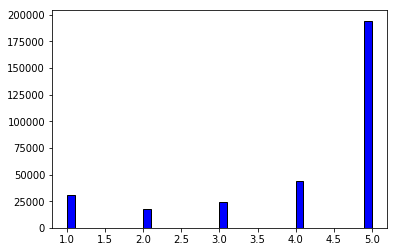

In [20]:
plt.hist(df['Score'], bins=40, facecolor="blue", edgecolor="black")
plt.show()

We can clearly see that most consumers give score 5 if they think the food is good. 

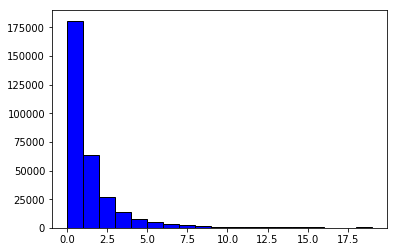

In [21]:
plt.hist(df['VotesHelpful'], range(0, 20), facecolor="blue", edgecolor="black")
plt.show()

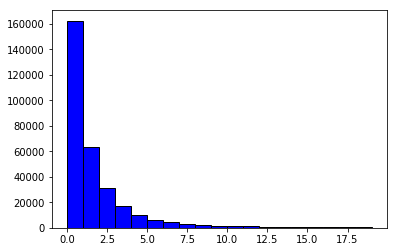

In [22]:
plt.hist(df['VotesTotal'], range(0, 20), facecolor="blue", edgecolor="black")
plt.show()

In [23]:
df["Sentiment"] = df["Score"].apply(lambda score: "positive" if score > 4 
                  else ("neutral" if score > 3 else "negative"))
df["Usefulness"] = (df["VotesHelpful"] / df["VotesTotal"]).apply(
                  lambda p: "useful" if p > 0.5 else "useless")
df = df[['Id', 'Summary', 'Text', 'Sentiment', 'Usefulness']]
df = df[df['Sentiment'] != 'neutral'] # filter out nuetral reviews

In [24]:
df.to_csv("./data/reviews-after-2010.csv", index=None, header=False)

In [25]:
n = len(df)
random.seed(101)
train = random.sample(range(n), int(n * TRAIN_SPLIT))
test = list(set(range(n)) - set(train))

In [26]:
df_train = df.iloc[train]
df_test = df.iloc[test]

In [27]:
df_train.head()

,Id,Summary,Text,Sentiment,Usefulness
123275,123276,wow,love great deal fast shipping great coffee ice...,positive,useless
444699,444700,jazz lacks pizzazz,nothing wrong coffee not exceptional love suns...,negative,useless
193791,193792,not par,absolutely love kind products buying family ye...,negative,useless
269932,269933,much,well thought done research not new bread makin...,negative,useless
256700,256701,badly shipped received boxes crumbs,great flavor expected cookies could taking fin...,negative,useless


In [28]:
df_test.head()

,Id,Summary,Text,Sentiment,Usefulness
150517,150518,love book,great book perfect condition arrived short amo...,positive,useless
3597,3598,best dog food price,amazing little popularity diamond pet foods se...,positive,useful
150515,150516,darling,author wrote wild things carol king wrote grea...,positive,useless
457204,457205,much cramping,purchased medication wellbutrin completely sto...,negative,useless
164571,164572,great conditioner wanted,vine offered conditioner looking replace brand...,positive,useless


In [29]:
df_train.to_csv("./data/reviews-after-2010-train.csv", index=None, header=False)
df_test.to_csv("./data/reviews-after-2010-test.csv", index=None, header=False)